# Линейные регрессионные модели


1.1.1 Пример

Проведём прямую y = kx + b или y = mx + b через экспирементальные точки

In [24]:
import numpy as np

x = np.array([0,1,2,3])
y = np.array([-1,0.2,0.9,2.1])

# Перепишем линейное уравнение y = mx + c как y = Ap, где A [[ x1 ]] и p = [[m], [c]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T
print(A)
# используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond= None)[0]
print(m, c)

[[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
0.9999999999999999 -0.9499999999999997


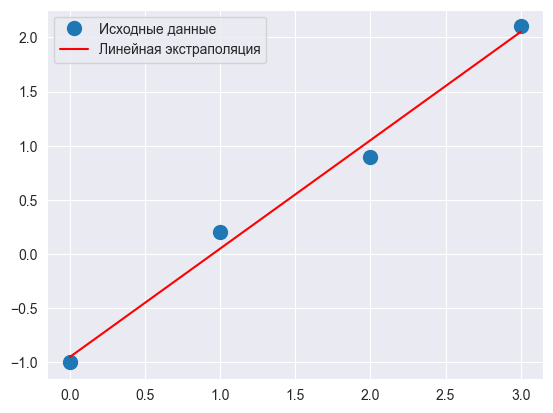

In [25]:
import matplotlib.pyplot as plt

plt.plot(x,y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x,m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 пример

Пусть x, y – вектора длиной n > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты полинома a, b, c по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

[-5.16762092 -4.38490979 -2.79915478 -2.3621833  -0.67376488  0.26287886
  1.06659069  2.28536483  2.99462361  4.0845967   4.99607133]
[25.22488678 15.87192437  8.69416514  4.26743754  1.38266313  0.11606345
  0.89986138  4.16622964  9.05825493 16.01124495 24.91476374]


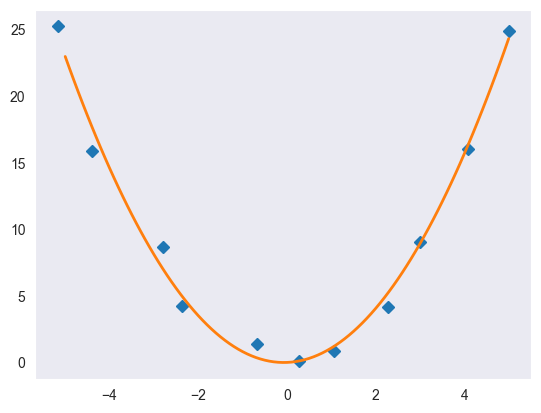

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *

# генерируем случайные X и Y
delta = 1.0
x = np.linspace(-5,5,11)
y = x**2 + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('NB4_x_data.txt','\n')
y.tofile('NB4_y_data.txt','\n')

# читаем данные из файла
x = np.fromfile('NB4_x_data.txt', float, sep='\n')
y = np.fromfile('NB4_y_data.txt', float, sep='\n')
print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^2 + bx + c с методом наименьших квадратов
# Задаём вектор m = [x^2 x E]
m = np.vstack((x**2, x, np.ones(11))).T
# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# на отрезке -5 5
x_prec = np.linspace(-5, 5, 101)

# рисуем прямую вида y = ax^2 + bx + c, подставляя коэффициенты  s[0] s[1] s[2]
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример

По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

[-4.60864228 -4.27819961 -2.8585095  -2.33901932 -0.82987995 -0.28882557
  0.90391812  2.27670913  3.01971453  4.48356092  4.67165908]
[24.58257138 16.46156833  9.09983239  3.6120564   1.37274933  0.0524622
  0.71558638  3.62737317  8.81451099 16.39349836 24.55082681]


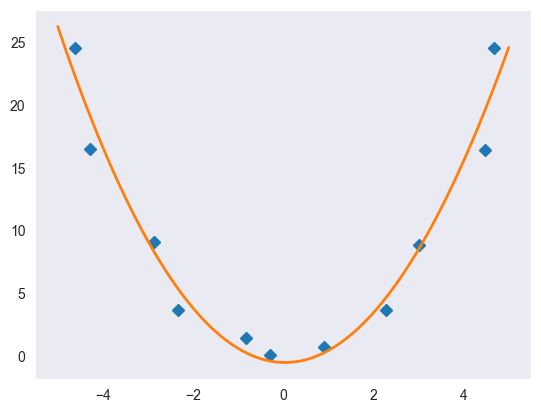

In [27]:
import matplotlib.pyplot as plt
from numpy.random import *

# генерируем случайные X и Y
delta = 1.0
x = np.linspace(-5,5,11)
y = x**2 + delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записываем данные в файл
x.tofile('NB4_x_data.txt','\n')
y.tofile('NB4_y_data.txt','\n')

x = np.fromfile('NB4_x_data.txt', float, sep='\n')
y = np.fromfile('NB4_y_data.txt', float, sep='\n')
print(x)
print(y)

# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# Задаём вектор m = [x^3 x E]
m = np.vstack((x**3, x**2, x, np.ones(11))).T
# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]
# интервал -5 5
x_prec = np.linspace(-5, 5, 101)

# рисуем прямую вида y = ax^3 + bx^2 + cx + d, подставляя коэффициенты  s[0] s[1] s[2] s[3]
plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw=2)
plt.grid()
plt.savefig('полином 3-й степени.png')

Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.


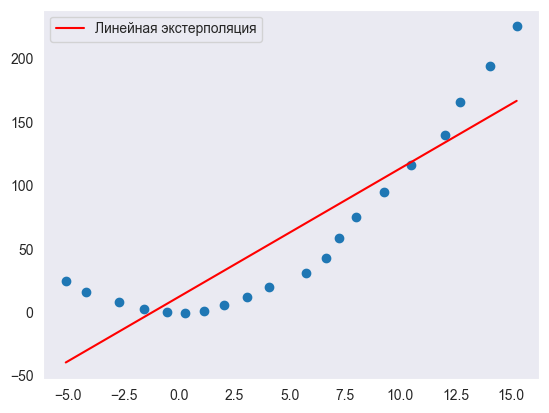

In [28]:
from numpy import *
import matplotlib.pyplot as plt
from numpy.random import *

delta = 1.0
dots = 20

x = linspace(-5, 15, dots)
y = x ** 2 + delta * (rand(dots) - 0.7)
x += delta * (rand(dots) - 0.7)

m = vstack([x, np.ones(dots)]).T
m, c = np.linalg.lstsq(m, y, rcond = None)[0]

plt.plot(x, y, 'o')
plt.plot(x, m * x + c, 'r', label = 'Линейная экстерполяция')

plt.legend()
plt.grid()

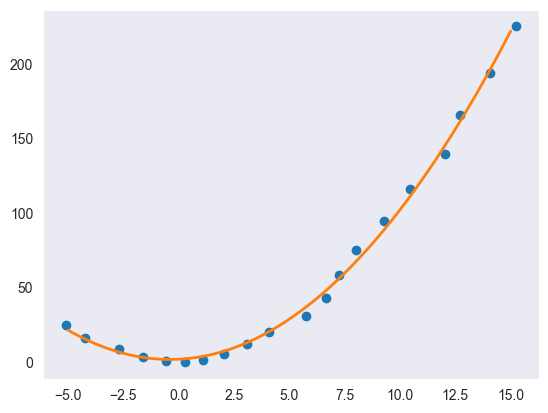

In [29]:
# Задаем вектор m = [x**2, x, E]
m = vstack((x ** 2, x, ones(dots))).T
#Находим коэффициенты при составляющих вектора m
s = linalg.lstsq(m, y, rcond = None)[0]
x_prec = linspace(-5, 15, 101)

plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()

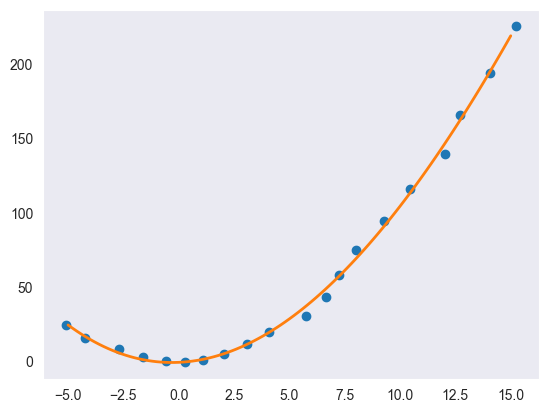

In [30]:
m = vstack((x ** 3, x ** 2, x, ones(dots))).T
s = linalg.lstsq(m, y, rcond = None)[0]

x_prec = linspace(-5, 15, 101)

plt.plot(x, y, 'o')
plt.plot(x_prec, s[0] * x_prec ** 3 + s[1] * x_prec ** 2 + s[2] * x_prec + s[3], '-', lw = 2)
plt.grid()

1.1.4 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида f(x, b) = b0 + b1exp(-b2x^2)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[1.02997191 0.93878973 1.01176155 1.00933751 0.98961613 0.91327224
 0.84356617 0.80469691 0.73222672 0.7376499  0.69168442 0.57406229
 0.56323328 0.55865706 0.61191802 0.52746268 0.52508435 0.35339082
 0.34352945 0.3400278  0.32012085 0.24891762 0.37161379 0.30095501
 0.3188516  0.31573864 0.26410542 0.27499261 0.25444647 0.31149013
 0.29880785 0.20467904 0.19981073 0.26445218 0.29429629 0.31924046
 0.19588003 0.31459412 0.25516758 0.23

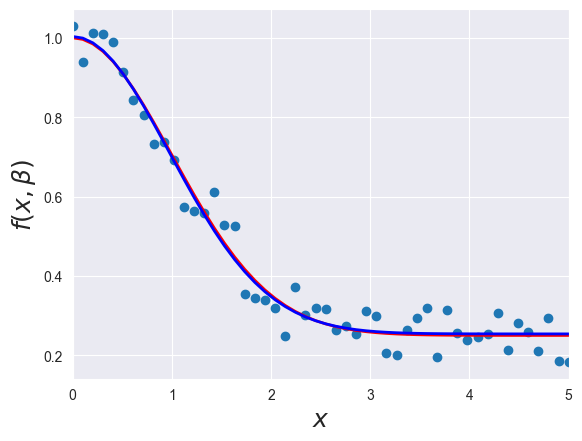

In [31]:
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x ** 2)
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
print(xdata)
print(ydata)

# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)

# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислим квадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

1.1.5 Пример

Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) f(x, b) = b0 + b1x
2) f(x, b) = b0 + b1x + b2x
3) f(x, b) = b0 + b1ln(x)
4) f(x, b) = b0 x^b1

[0.24150413 0.75449237]
0.00010091707645630289
0.08873743238962821


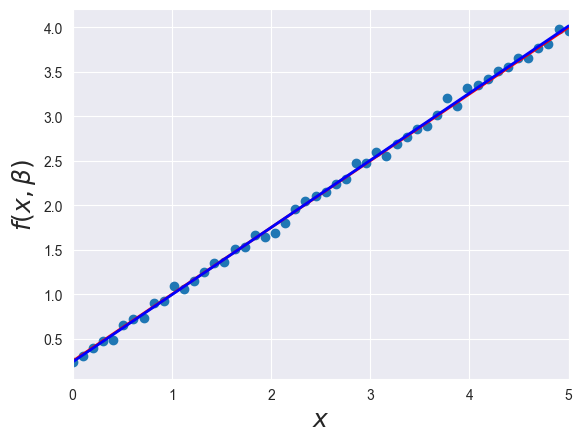

In [32]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f (x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[0.24355602 0.75618418 0.49955518]
0.00014891995035206453
0.12418365217393612


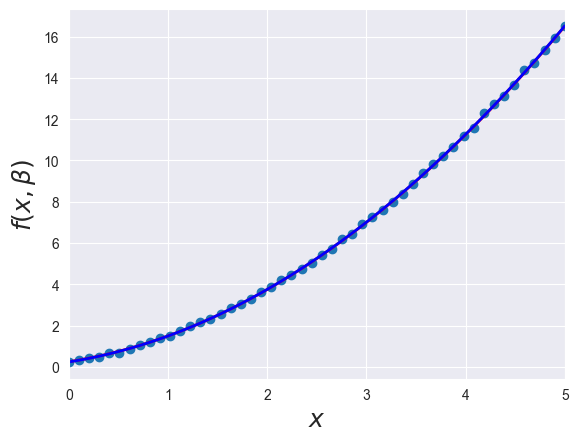

In [33]:
# 2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f (x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2
# Зададим массив точек xi
xdata = np.linspace(0, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.02001746 1.97480914]
4.1232902614549036e-05
0.09534867311258288


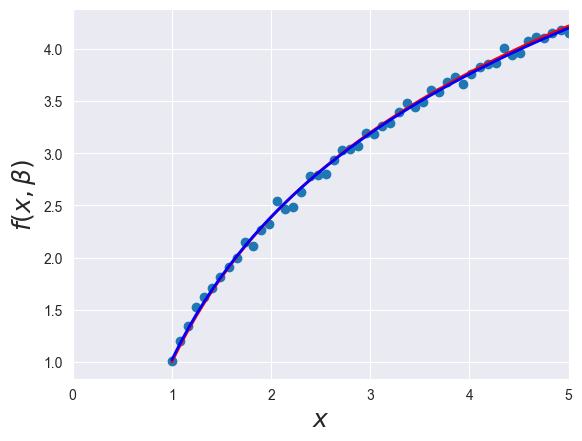

In [34]:
# 3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[1.00607589 2.00023671]
0.00010702009450080317
0.11936295078995311


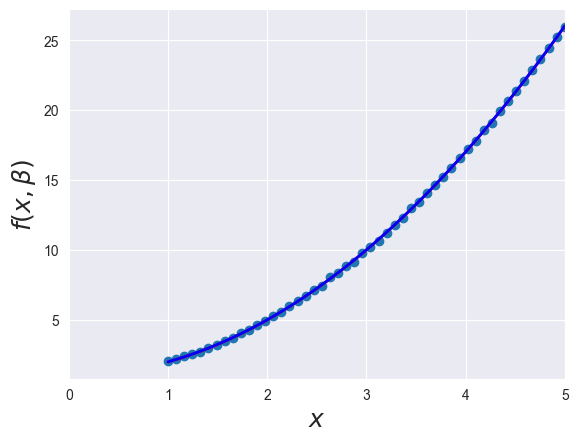

In [35]:
# 4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f (x, b0, b1):
    return b0 + x ** b1
# Зададим массив точек xi
xdata = np.linspace(1, 5, 50)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

1.1.5 Задание № 1:

Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных

[2.00592687 0.60021212]
6.515879978263842e-05
0.023457167799596834


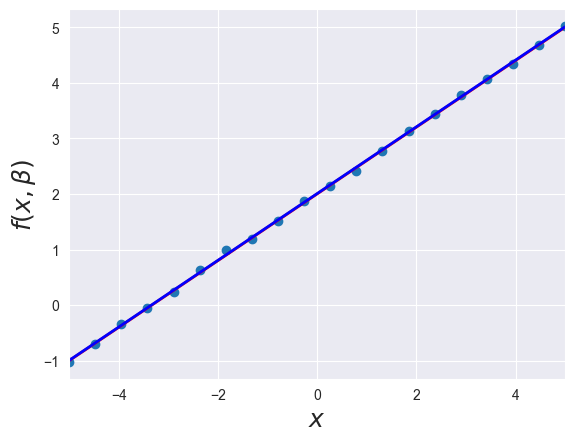

In [36]:
# 1
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (2, 0.6)
beta = (2, 0.6)
def f (x, b0, b1):
    return b0 + b1 * x
# Зададим массив точек xi
xdata = np.linspace(-5, 5, 20)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[2.29997192e+01 2.24121186e-01 1.02437148e-02]
0.00014476919781826095
0.10157322190312243


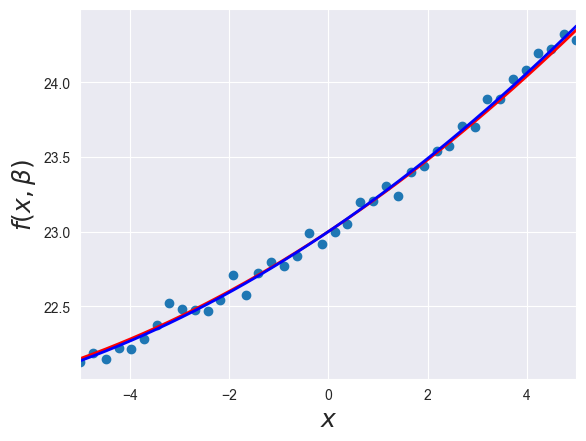

In [37]:
# 2
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (23, 0.22, 0.01)
beta = (23, 0.22, 0.01)
def f (x, b0, b1, b2):
    return b0 + b1 * x + b2 * x ** 2
# Зададим массив точек xi
xdata = np.linspace(-5, 5, 40)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(-5, 5)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[-2.21598216e-03 -4.99802396e+00]
8.79103307047565e-06
2.5006846987819387


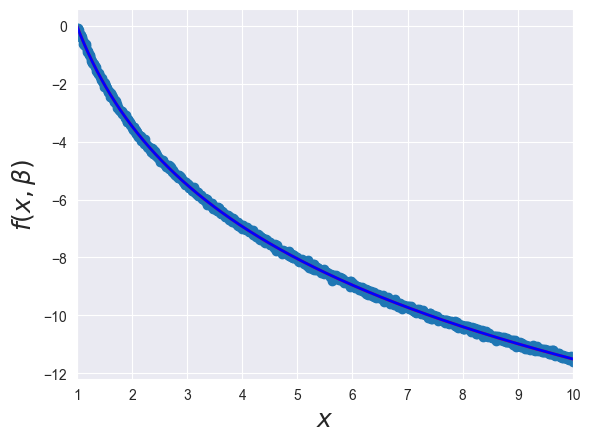

In [38]:
# 3
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0, -5)
beta = (0, -5)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata = np.linspace(1, 10, 1000)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

[13.98104513  2.75364704]
-0.00011559307446144271
0.14710856951141155


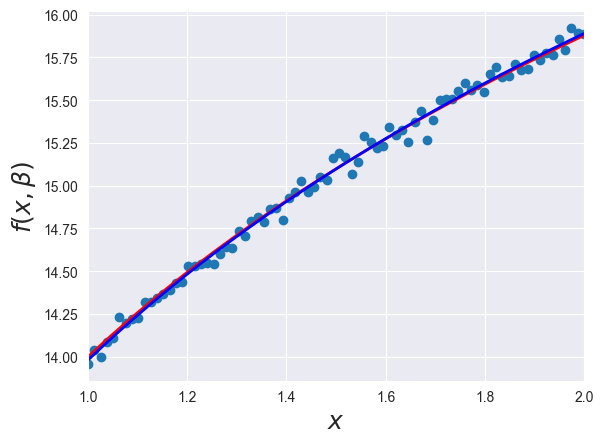

In [39]:
# 4
# Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (2, 0.6)
beta = (14, 2.71)
def f (x, b0, b1):
    return b0 + b1 * np.log(x)
# Зададим массив точек xi
xdata = np.linspace(1, 2, 80)
# Создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# Зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = curve_fit(f, xdata, ydata)
print(beta_opt)
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
print(lin_dev)

# Вычислимквадратичное отклонение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals ** 2)
print(fres)

fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(1, 2)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$f(x, \beta)$', fontsize=18)
plt.show()

# 1.2.1

Линейная регрессия - это широко используемый метод статистического
анализа, который использует регрессионный анализ в математической
статистике для определения количественной взаимосвязи между двумя или
более переменными. Если регрессионный анализ включает две или более
независимых переменных, а связь между зависимой и независимой
переменными является линейной, тогда имееи дело с множественной линейной
регрессией.
В этом разделе мы увидим, как библиотеку Scikit-Learn в Python для машинного
обучения можно использовать для реализации функций регрессии. Мы начнем
с простой линейной регрессии с участием двух переменных, а затем перейдем к
линейной регрессии с участием нескольких переменных.

1.2.1 Пример

Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

In [40]:
# Импортируем необходимые библиотеки
# Используем pandas и numpy для обработки данных
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Созадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 3.75, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50],
           'Оценка': [10, 22, 13, 43, 20, 22, 33, 50, 62, 48, 55, 75, 62, 73, 81, 76, 64, 82, 90, 93]}

dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [41]:
# Исследуем набор данных
dataset.shape

(20, 2)

In [42]:
# Исследуем набор данных
dataset.describe()

,Учебное время,Оценка
count,20.000000,20.000000
mean,2.887500,53.700000
std,1.501041,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.875000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


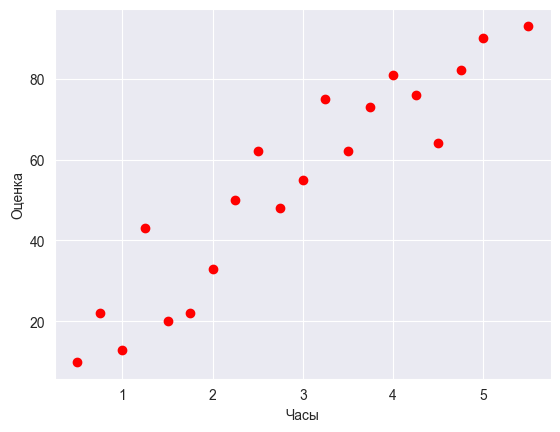

In [43]:
# Нарисуем точечную диаграмму
plt.scatter(dataset['Учебное время'], dataset['Оценка'], color= 'r', label= 'данные экзамена')
plt.xlabel('Часы')
plt.ylabel('Оценка')
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [44]:
# Разделим информацию на "атрибуты" и "метки"
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(x)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [3.75]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [45]:
# Теперь, когда у нас есть атрмибуты и метки, необходимо разделить из на обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Далее можно обучить алгоритм линейной регрессии
# Необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regression = LinearRegression()
regression.fit(x_train, y_train)

# Подведем поучившиеся коэффициенты для линии регрессии
print(regression.intercept_)
print(regression.coef_)

3.168632075471699
[17.18867925]


Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку.

In [46]:
y_pred = regression.predict(x_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,89.112028
1,22,16.060142
2,93,97.706368
3,62,46.140330


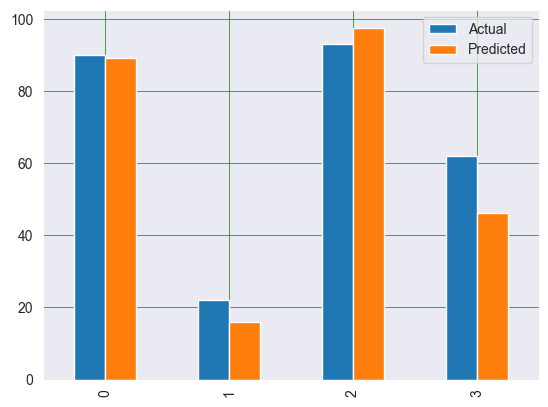

In [47]:
# визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

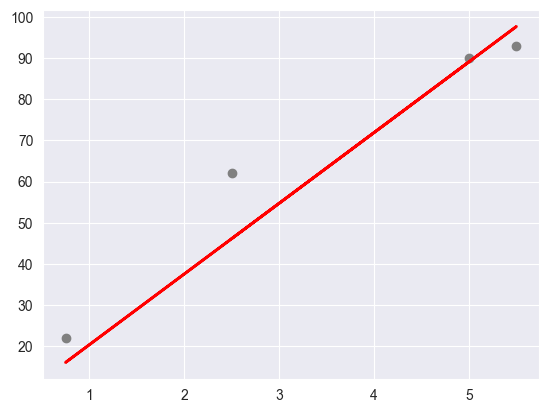

In [48]:
# Посмотрим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)

Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.


26780.09915062818
[9312.57512673]


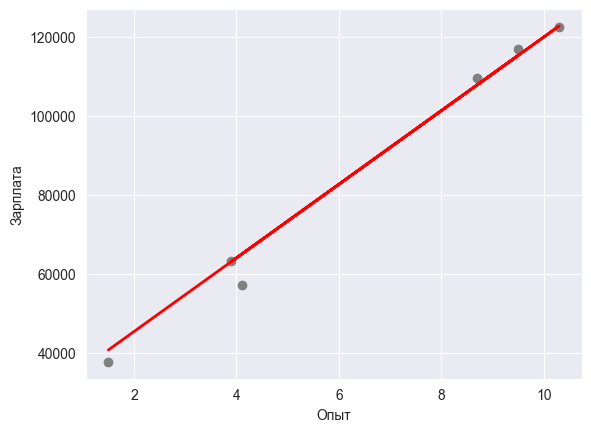

In [49]:
# Загрузить данные
url = 'https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv'
datafame = pd.read_csv(url)

# Рвзделим данные на "атрибуты" и "метки"
x = datafame.iloc[:, :-1].values
y = datafame.iloc[:, 1].values

# Разделим данные на обучающий набор (80%) и тестовый набор (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Обучим алгоритм линейной регрессии
regression = LinearRegression().fit(x_train, y_train)

# Коэффициенты для линии регрессии
print(regression.intercept_)
print(regression.coef_)

# Построим предсказание
y_pred = regression.predict(x_test)
plt.xlabel('Опыт')
plt.ylabel('Зарплата')
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()




# 1.3. Множественная регрессия

1.3.1 Пример

Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq

In [50]:
import numpy as np

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]
x = np.transpose(x) # транспонировать входной вектор
x = np.c_[x, np. ones(x.shape[0])] # и наклон смещения
linreg = np.linalg.lstsq(x, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Пример

Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [51]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

y = [1, 2, 3, 4, 3, 4, 5, 3, 5, 5, 4, 5, 4, 5, 4, 5, 6, 0, 6, 3, 1, 3, 1]
x = [[0, 2, 4, 1, 5, 4, 5, 9, 9, 9, 3, 7, 8, 8, 6, 6, 5, 5, 5, 6, 6, 5, 5],
     [4, 1, 2, 3, 4, 5, 6, 7, 5, 8, 7, 8, 7, 8, 7, 8, 6, 8, 9, 2, 1, 5, 6],
     [4, 1, 2, 5, 6, 7, 8, 9, 7, 8, 7, 8, 7, 4, 3, 1, 2, 3, 4, 1, 3, 9, 7]]

# Формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_x = np.array(x)
new_x = new_x.transpose()
df2 = pd.DataFrame(new_x)
df1 = df1.rename(columns= {0: 'y'}, inplace=False)
df2 = df2.rename(columns={0: 'x1', 1: 'x2', 2: 'x3'}, inplace=False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [52]:
# Изучим данные
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [53]:
# Разделим данные на метки и атрибуты
x = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тотже код, что и раньше, используя метод fit() класса LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regression.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [54]:
# Сделать прогноз на тестовых данных
y_pred = regression.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [55]:
# Оценить производительность алгоритма. Найдем значение для MSE
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error:  1.3272699242343065


1.1.5 Задание № 1:

Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз.
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2.
https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [56]:
# Импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Загрузить данные
url = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'
datafame = pd.read_csv(url)

# Формируем DataFrame из двух списков
x = datafame.iloc[:, :-1].values
y = datafame.iloc[:, 1].values
df1 = pd.DataFrame(y).rename(columns={0: 'quality'}, inplace=False)
df2 = pd.DataFrame(x).rename(columns={0: 'fixed acidity', 1: 'volatile acidity', 2: 'citric acid', 3: 'residual sugar', 4: 'chlorides', 5: 'free sulfur dioxide', 6: 'total sulfur dioxide', 7: 'density', 8: 'pH', 9: 'sulphates', 10: 'alcohol'}, inplace=False)
frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')

# Разделим данные на метки и атрибуты
x = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
y = dataset['quality']

# Разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Для обучения алгоритма мы выполняем тотже код, что и раньше, используя метод fit() класса LinearRegression
regression = LinearRegression()
regression.fit(x_train, y_train)

# Выведем коэффициенты модели
coeff_df = pd.DataFrame(regression.coef_, x.columns, columns=['Coefficient'])
coeff_df


,Coefficient
fixed acidity,5.936245e-18
volatile acidity,1.000000e+00
citric acid,-9.676288e-15
residual sugar,1.471046e-15
chlorides,1.137762e-15
free sulfur dioxide,-2.220446e-16
total sulfur dioxide,0.000000e+00
density,8.963587e-15
pH,-1.283695e-16
sulphates,-5.117434e-17


In [57]:
# Сделать прогноз на тестовых данных
y_pred = regression.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,0.470,0.470
1032,0.820,0.820
1002,0.290,0.290
487,0.645,0.645
979,0.450,0.450
...,...,...
794,0.270,0.270
813,0.390,0.390
1322,0.340,0.340
704,0.765,0.765


# 1.3.2 Задание ВАРИАНТ № 10

Экспериментально получены N − значений величины Y при
различных значениях величины X. Построить полиномы первой и второй
степени, аппроксимирующие результаты эксперимента, с применением
метода наименьших квадратов. Результаты выводятся в виде таблиц
значений и графиков, полученных полиномов.

In [58]:
# Входные данные. Вариант 10
x = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
y = np.array([6.0, 3.0, 2.0, 6.0, 2.0, 5.0])

In [59]:
# Полином первой степени
# Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1]] и p = [[m], [c]]
# Построим A по x:
A = np.vstack([x, np.ones(len(x))]).T

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond=None)[0]

# Построим таблицу полученных результатов
dataset = {'y': y, 'y_prec': [m * i + c for i in x]}
df = pd.DataFrame(dataset)
df

,y,y_prec
0,6.0,4.285714
1,3.0,4.171429
2,2.0,4.057143
3,6.0,3.942857
4,2.0,3.828571
5,5.0,3.714286


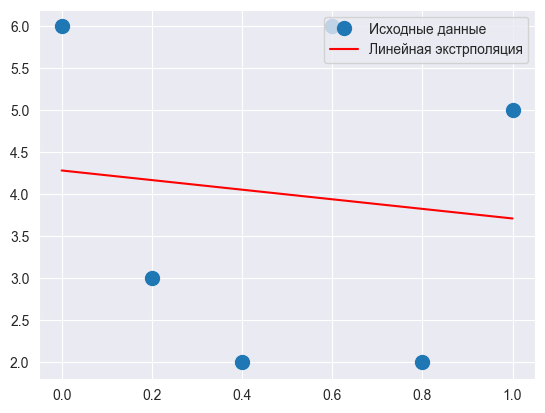

In [60]:

# Построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m * x + c, 'r', label='Линейная экстрполяция')
plt.legend()
plt.show()

In [61]:
# Полином второй степени
# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# Задаем вектор m = [x**2, x, E]
m = np.vstack([x ** 2, x, np.ones(len(x))]).T

# Находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# Построим таблицу полученных результатов
dataset = {'y': y, 'y_prec': [s[0] * i ** 2 + s[1] * i + s[2] for i in x]}
df = pd.DataFrame(dataset)
df

,y,y_prec
0,6.0,5.357143
1,3.0,3.957143
2,2.0,3.200000
3,6.0,3.085714
4,2.0,3.614286
5,5.0,4.785714


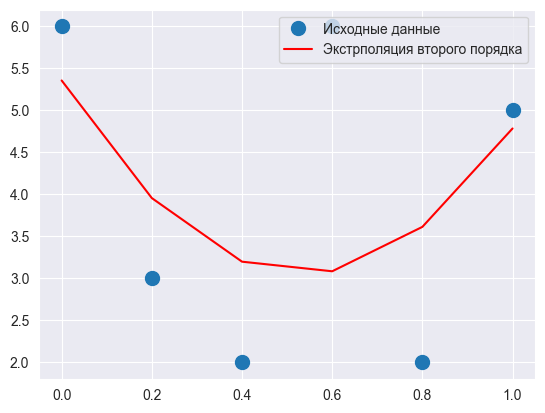

In [62]:
# Построим график полученной прямой и укажем на нем точки
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, s[0] * x ** 2 + s[1] * x + s[2], 'r', label='Экстрполяция второго порядка')
plt.legend()
plt.show()